In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "TSLA.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jillanisofttech/tesla-stock-price",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Select the 'Close' price for the model
data = df['Close'].values
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

print("Data preprocessing complete.")

Data preprocessing complete.


In [ ]:
# Create sequences for the RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define the look-back period
look_back = 60

# Create training and testing datasets
X, y = create_dataset(scaled_data, look_back)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Sequence creation complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Sequence creation complete.
X_train shape: (462, 60)
X_test shape: (116, 60)
y_train shape: (462,)
y_test shape: (116,)


In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("RNN model built and compiled.")
model.summary()

RNN model built and compiled.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape the training data for the RNN input layer
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

print("Model training complete.")

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1475
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0015
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0017
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0013
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0011
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.9246e-04
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 

In [ ]:
# Prepare the last 'look_back' days of data for prediction
last_look_back_data = scaled_data[len(scaled_data) - look_back:]
last_look_back_data = last_look_back_data.reshape(1, look_back, 1)

# Predict the next 20 days
predicted_prices = []
current_batch = last_look_back_data

for i in range(20):
    predicted_price = model.predict(current_batch)
    predicted_prices.append(predicted_price[0, 0])

    # Update the current batch with the new prediction
    current_batch = np.append(current_batch[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Invert the scaling to get actual prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

print("Predicted prices for the next 20 days:")
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted prices for the next 20 days:
[[972.048  ]
 [978.8486 ]
 [960.16595]
 [943.04706]
 [937.6583 ]
 [934.86816]
 [929.4673 ]
 [922.4676 ]
 [912.55835]
 [910.3512 ]
 [907.96674]
 [895.42395]
 [888.6163 ]
 [887.1565 ]
 [883.216  ]
 [879

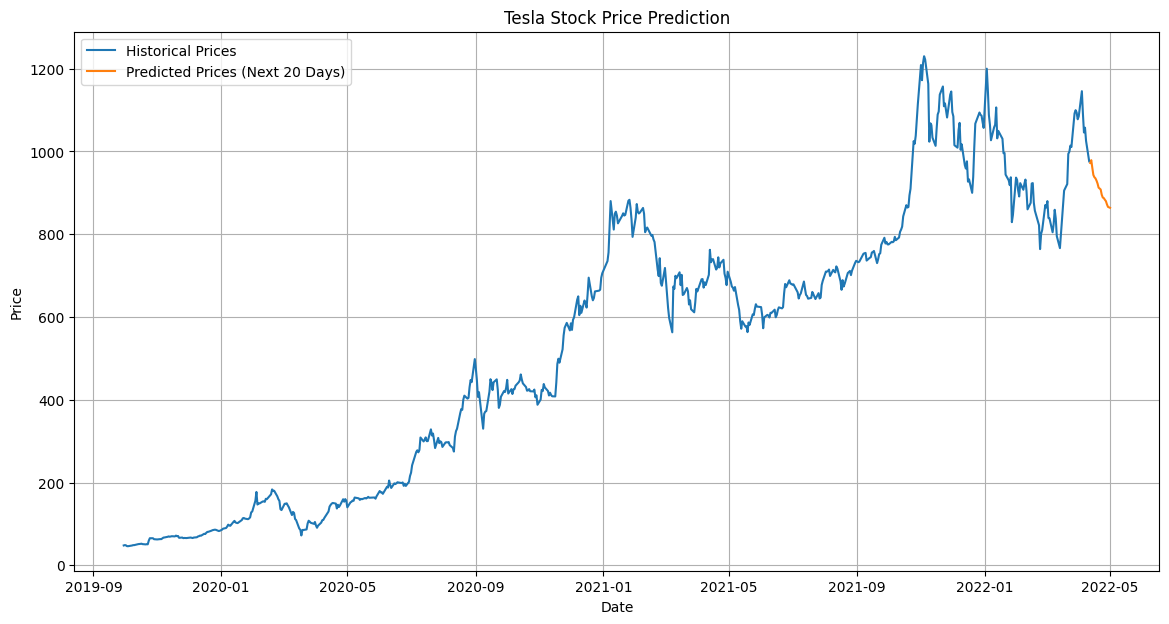

In [ ]:
# Create a date range for the predicted prices
last_date = df.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=20, freq='D')

# Create a pandas Series for predicted prices with the new date index
predicted_prices_series = pd.Series(predicted_prices.flatten(), index=predicted_dates)

# Plot the historical data and the predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Historical Prices')
plt.plot(predicted_prices_series, label='Predicted Prices (Next 20 Days)')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a date range for the predicted prices
last_date = df.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=20, freq='D')

# Create a pandas Series for predicted prices with the new date index
predicted_prices_series = pd.Series(predicted_prices.flatten(), index=predicted_dates)

print("Predicted prices for the next 20 days:")
display(predicted_prices_series)

Predicted prices for the next 20 days:


,0
2022-04-12,972.047974
2022-04-13,978.848572
2022-04-14,960.165955
2022-04-15,943.047058
2022-04-16,937.658325
2022-04-17,934.868164
2022-04-18,929.467285
2022-04-19,922.467590
2022-04-20,912.558350
2022-04-21,910.351196
